In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
# 세세히 하지만 시간이 오래 걸린다

In [7]:
import numpy as np

In [8]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [11]:
gs.best_params_

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}

In [12]:
print(gs.score(train_input, train_target))

0.892053107562055


In [13]:
print(gs.score(test_input, test_target))

0.8615384615384616


# gridsearchcv VS randomizedsearchcv

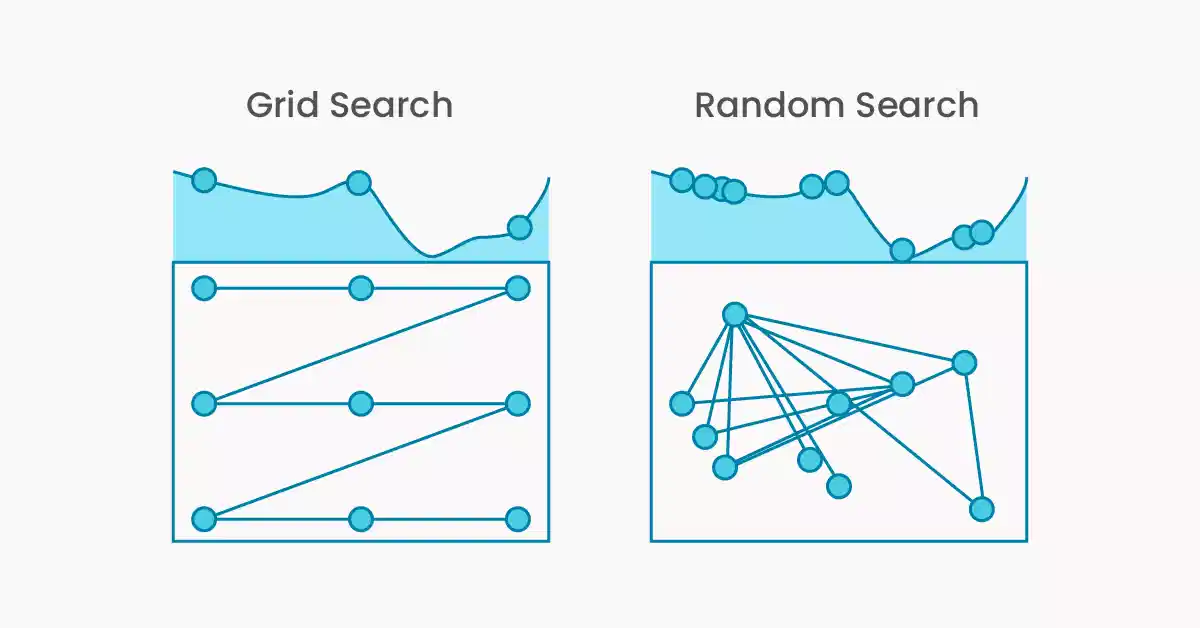

# 랜덤 서치

In [14]:
from scipy.stats import uniform, randint

In [15]:
help(uniform)

Help on uniform_gen in module scipy.stats._continuous_distns object:

class uniform_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  uniform_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A uniform continuous random variable.
 |  
 |  In the standard form, the distribution is uniform on ``[0, 1]``. Using
 |  the parameters ``loc`` and ``scale``, one obtains the uniform distribution
 |  on ``[loc, loc + scale]``.
 |  
 |  %(before_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      uniform_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, *args, **kwds)
 |      Maximum likelihood estimate for the location and scale parameters.
 |      
 |      `uniform.fit` uses only the following parameters.  Because exact
 |      formulas are used, th

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
        #   두 숫자 사이의 분포에서 무작위 값을 생성
          'max_depth': randint(20, 50),
        #   두 숫자 사이의 정수 중 하나를 무작위로 선택
        # 결정 트리의 최대 깊이를 결정한다
          'min_samples_split': randint(2, 25),
        #   사이의 정수 중 하나를 무작위로 선택
        # 노드를 분할하는데 필요한 최소 샘플 수를 설정
          'min_samples_leaf': randint(1, 25),
        #   리프 노드에 있어야 하는 최소 샘플 수를 설정
          }

In [16]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 20),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_split': range(2, 100, 10)},
                   random_state=42)

# 확인 문제

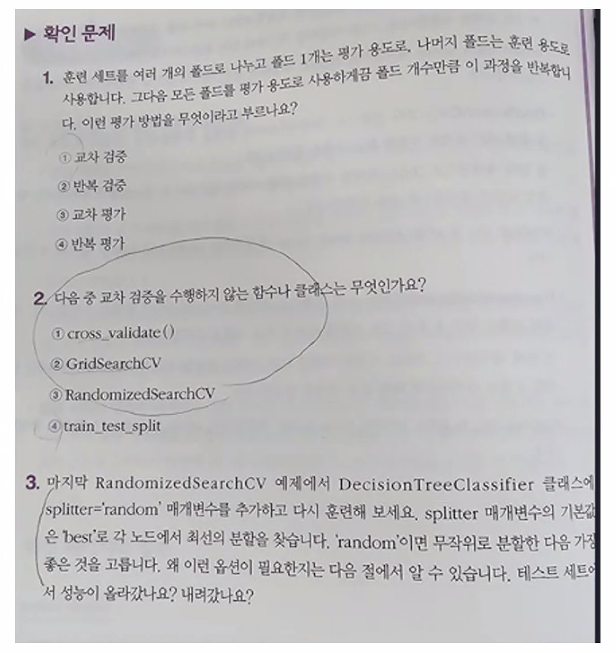

In [17]:
# 1. 1 // 2. 4

In [18]:
# 3번

gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', # 매개변수 추가
                                               random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 20),
                                        'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'min_samples_split': range(2, 100, 10)},
                   random_state=42)

In [19]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'min_samples_split': 32, 'min_impurity_decrease': 0.0001, 'max_depth': 15}
0.8535701858295699
0.8353846153846154
